## Definition


## Capstone  2 Overview
Employee churn is a costly problem for companies like Starline Co. The true cost of replacing an employee can often be quite large.  The cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

## Problem Statement
Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance.I'll be using both descriptive and inferential statistical approach to understand the drivers of churn happening within the company which will result in core varaibles attributed to churn will be highlighted . This capstone project would fall under what is commonly known as "HR Analytics", "People Analytics".

In [1]:
#let's import liraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#let's look into the descriptive side of data 
df=pd.read_csv('Capstone2_HR.csv')
df.info()

data=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset contains 35 numerical and categorical columns and 1470 observations providing various information on employee's personal and employment details.The data provided has no missing values.

In [3]:
df.head()


df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
#categorizing data into personal & non-personal factors
 #Selecting  6 personal attributes 
personal=['Age',  'Education','Gender','MaritalStatus','RelationshipSatisfaction','JobRole','Attrition']
 #Selecting  13 non-personal attributes that I believed to have a strong impact on 'Attrition' avoiding similar attributes         
non_personal=['MonthlyRate','JobSatisfaction', 'MonthlyIncome','PercentSalaryHike',
         'WorkLifeBalance', 'YearsAtCompany','PerformanceRating','MonthlyRate','NumCompaniesWorked','DistanceFromHome',
'TotalWorkingYears','JobLevel','YearsInCurrentRole','Attrition']

category=['Gender','MaritalStatus','Education','JobSatisfaction','WorkLifeBalance','JobRole','Attrition']





In [5]:
df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


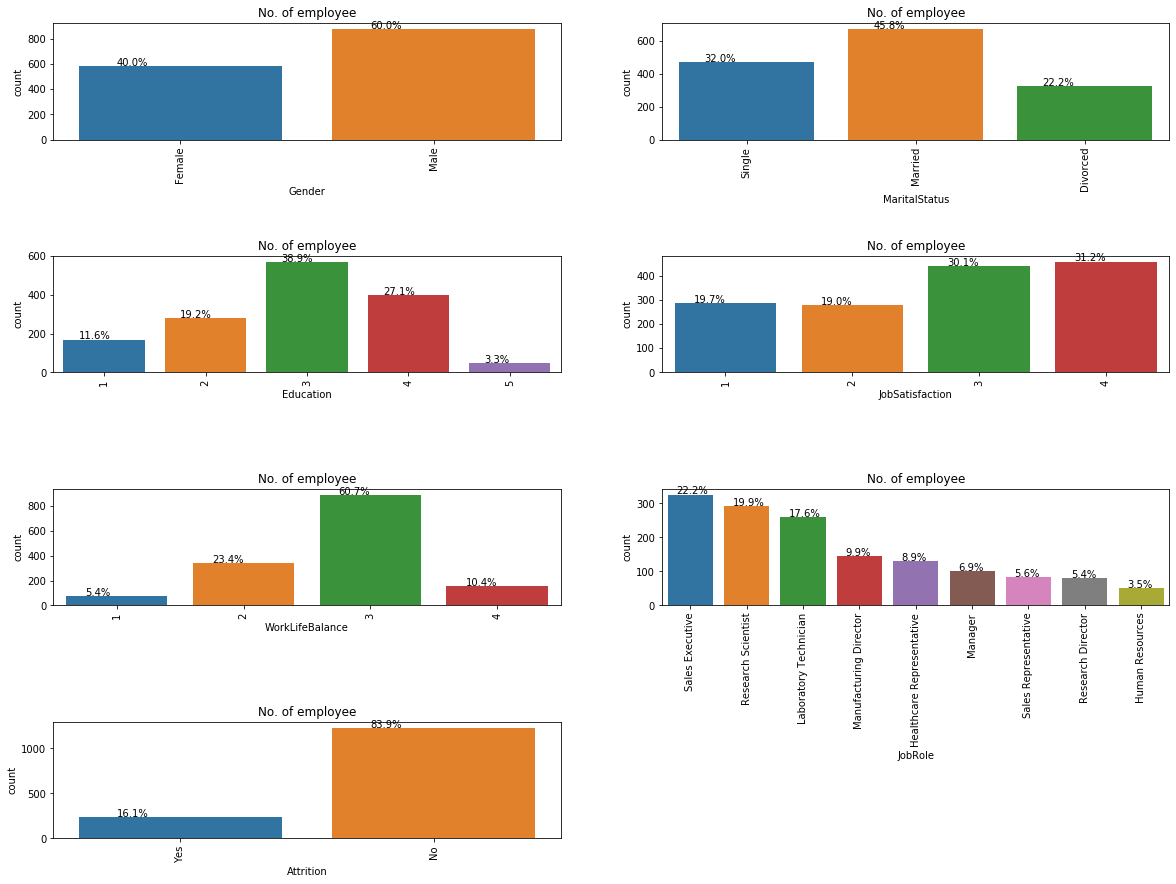

In [6]:
fig=plt.subplots(figsize=(20,15))
for i, j in enumerate(category):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax=sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")
    total = len(df[j])
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(total/100)), (p.get_x()+0.15, p.get_height()+1))
    

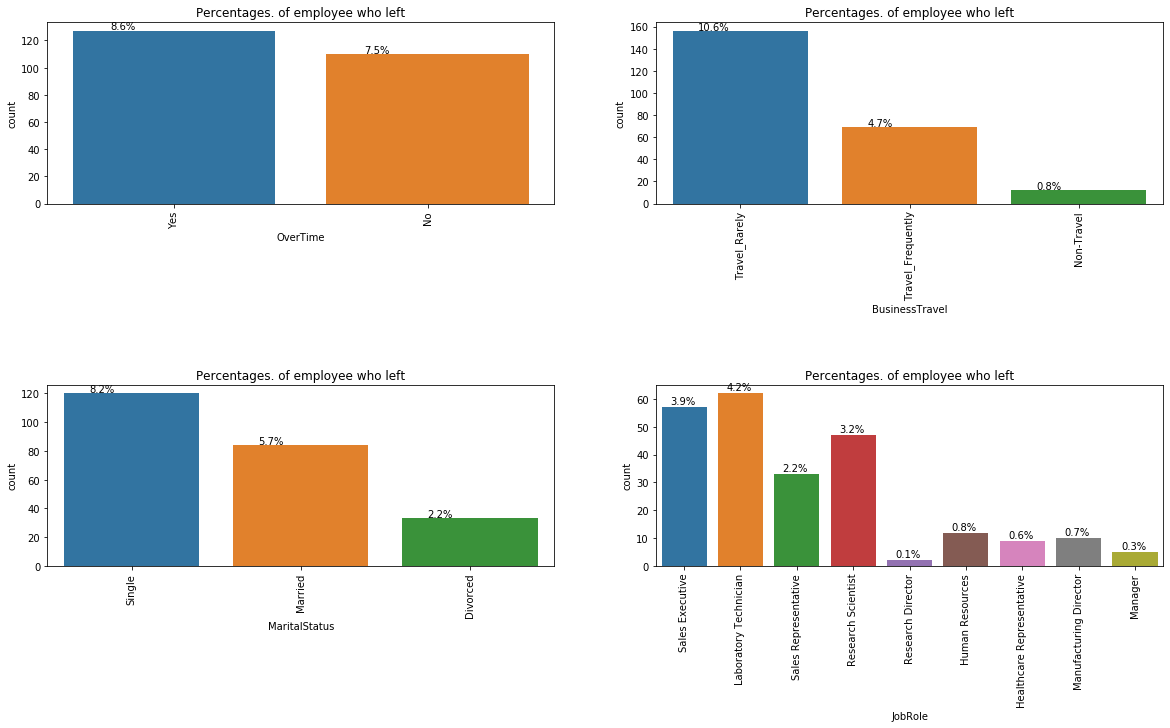

In [14]:
cat=['OverTime','BusinessTravel','MaritalStatus','JobRole']

fig=plt.subplots(figsize=(20,10))
for i, j in enumerate(cat):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    
    ax=sns.countplot(x=j,data = df[df['Attrition']=='Yes'])
    plt.xticks(rotation=90)
    
    
    plt.title("Percentages. of employee who left")
    total = len(df[j])
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(total/100)), (p.get_x()+0.15, p.get_height()+1))
    
   
    



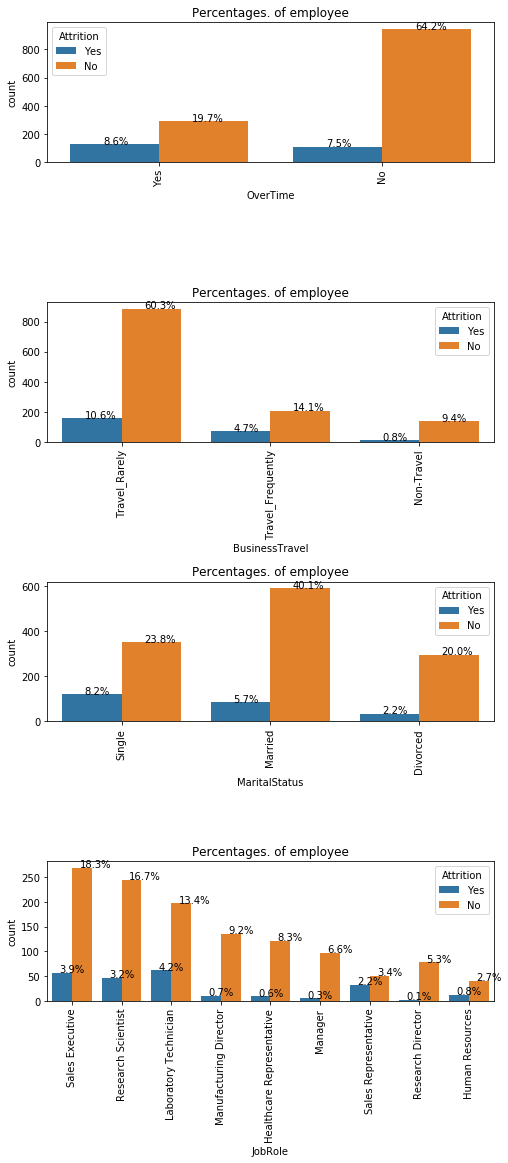

In [7]:
cat=['OverTime','BusinessTravel','MaritalStatus','JobRole']

fig=plt.subplots(figsize=(8,18))
for i, j in enumerate(cat):
    plt.subplot(4, 1, i+1)
    plt.subplots_adjust(hspace = 1.0)
    
    ax=sns.countplot(x=j,data = df, hue='Attrition')
    plt.xticks(rotation=90)
    
    
    plt.title("Percentages. of employee")
    total = len(df[j])
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(total/100)), (p.get_x()+0.15, p.get_height()+1))
    
   
    

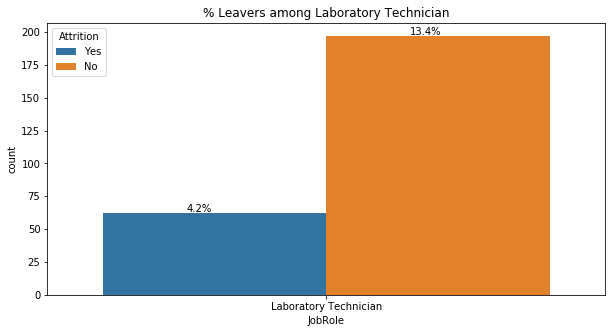

In [25]:
cat=['JobRole']

fig=plt.subplots(figsize=(10,5))
for i, j in enumerate(cat):
    plt.subplot(1, 1, i+1)
    plt.subplots_adjust(hspace = 1.0)
    
    ax=sns.countplot(x=j,data = df[df['JobRole']=='Laboratory Technician'], hue='Attrition')
    plt.xticks(rotation=0)
    
    
    plt.title("% Leavers among Laboratory Technician")
    total = len(df[j])
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(total/100)), (p.get_x()+0.15, p.get_height()+1))
    
   

In [10]:
print("Percentage of Overtime_Yes is {:.1f}% and of OverTime_No is: {:.1f}%".format(
    df[df['OverTime'] == 'Yes'].shape[0] / df['OverTime'].shape[0]*100,
    df[df['OverTime'] == 'No'].shape[0] / df['OverTime'].shape[0]*100))

Percentage of Overtime_Yes is 28.3% and of OverTime_No is: 71.7%


In [11]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [12]:
for field in list(df['JobRole'].unique()):
    print("Percentage of "+ str(field) + " is {:.1f}%  ".format(
    df[df['JobRole'] == field].shape[0] / df['JobRole'].shape[0]*100))

Percentage of Sales Executive is 22.2%  
Percentage of Research Scientist is 19.9%  
Percentage of Laboratory Technician is 17.6%  
Percentage of Manufacturing Director is 9.9%  
Percentage of Healthcare Representative is 8.9%  
Percentage of Manager is 6.9%  
Percentage of Sales Representative is 5.6%  
Percentage of Research Director is 5.4%  
Percentage of Human Resources is 3.5%  


In [13]:
pd.crosstab(df.JobRole,[df.OverTime,df.BusinessTravel,df.MaritalStatus] )

OverTime                          No                                           \
BusinessTravel            Non-Travel                Travel_Frequently           
MaritalStatus               Divorced Married Single          Divorced Married   
JobRole                                                                         
Healthcare Representative          5       4      1                 5       7   
Human Resources                    2       2      0                 1       4   
Laboratory Technician              5      10      9                 5      16   
Manager                            2       2      4                 4       5   
Manufacturing Director             3       4      3                 7       9   
Research Director                  2       3      0                 3       1   
Research Scientist                 7       6      7                10      10   
Sales Executive                    4      15     10                 6      25   
Sales Representative               2       1      2                 3       8   

OverTime                                                             Yes  \
BusinessTravel                   Travel_Rarely                Non-Travel   
MaritalStatus             Single      Divorced Married Single   Divorced   
JobRole                                                                    
Healthcare Representative      5            15      28     24          3   
Human Resources                1             3      18      8          0   
Laboratory Technician         17            32      60     43          1   
Manager                        1            12      34     11          0   
Manufacturing Director         8            20      34     18          1   
Research Director              1             9      24     14          1   
Research Scientist             8            25      64     58          3   
Sales Executive               16            33      75     48          3   
Sales Representative           5             3      18     17          0   

OverTime                                                                   \
BusinessTravel                           Travel_Frequently                  
MaritalStatus             Married Single          Divorced Married Single   
JobRole                                                                     
Healthcare Representative       1      1                 0       7      2   
Human Resources                 0      0                 2       2      0   
Laboratory Technician           2      1                 3       5      5   
Manager                         2      2                 2       1      0   
Manufacturing Director          1      1                 1       1      3   
Research Director               0      0                 1       3      3   
Research Scientist              3      2                 8       8     10   
Sales Executive                 3      4                 2       5      5   
Sales Representative            0      0                 0       1      6   

OverTime                                                
BusinessTravel            Travel_Rarely                 
MaritalStatus                  Divorced Married Single  
JobRole                                                 
Healthcare Representative             6      14      3  
Human Resources                       6       2      1  
Laboratory Technician                 9      23     13  
Manager                               3      12      5  
Manufacturing Director                4      18      9  
Research Director                     7       7      1  
Research Scientist                    9      31     23  
Sales Executive                      21      28     23  
Sales Representative                  3       6      8

                       % of Leavers
JobRole                            
Sales Representative          39.76
Laboratory Technician         23.94
Human Resources               23.08
Sales Executive               17.48
Research Scientist            16.10


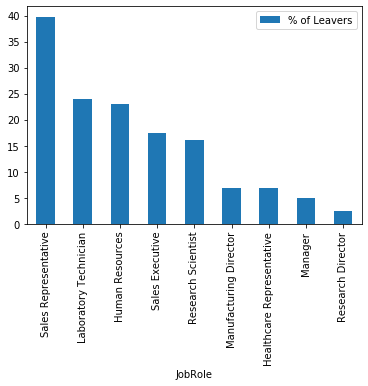

In [8]:

df_Jo = pd.DataFrame(columns=["JobRole", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_Jo.loc[i] = (field, round(ratio*100,2))
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_Jo.groupby(by="JobRole").sum()
df_j=df_JR.sort_values(by="% of Leavers",ascending=False)
print (df_j.head())
ax = df_j.plot.bar(rot=90)



 

          % of Leavers
OverTime              
Yes              30.53
No               10.44


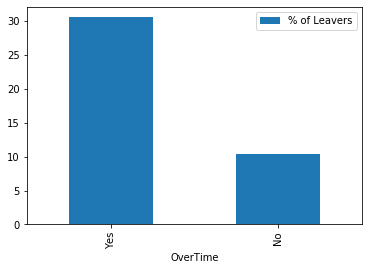

In [15]:
df_Jo = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_Jo.loc[i] = (field, round(ratio*100,2))
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_Jo.groupby(by="OverTime").sum()
df_j=df_JR.sort_values(by="% of Leavers",ascending=False)
print (df_j.head())
ax = df_j.plot.bar(rot=90)


In [59]:
print("Percentage of OverTime_YES is {:.1f}% and of OverTime_NO is: {:.1f}%".format(
    df[df['OverTime'] == 'Yes'].shape[0] / df['OverTime'].shape[0]*100,
    df[df['OverTime'] == 'No'].shape[0] / df['OverTime'].shape[0]*100))

Percentage of OverTime_YES is 28.3% and of OverTime_NO is: 71.7%


In [48]:
df.shape[0]
df[df['OverTime']=='Yes'].shape[0]/df.shape[0]
df['OverTime'].shape[0] 

print(df[df['MonthlyIncome']<4700].shape[0]/df.shape[0]*100)
df[df['TotalWorkingYears']<8.2].shape[0]/df.shape[0]*100

46.87074829931973


42.517006802721085

                   % of Leavers
BusinessTravel                 
Travel_Frequently         24.91
Travel_Rarely             14.96
Non-Travel                 8.00


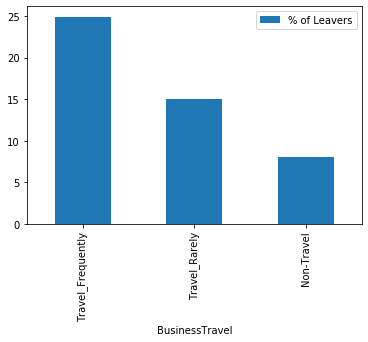

In [60]:
df_Jo = pd.DataFrame(columns=["BusinessTravel", "% of Leavers"])
i=0
for field in list(df['BusinessTravel'].unique()):
    ratio = df[(df['BusinessTravel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['BusinessTravel']==field].shape[0]
    df_Jo.loc[i] = (field, round(ratio*100,2))
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_Jo.groupby(by="BusinessTravel").sum()
df_j=df_JR.sort_values(by="% of Leavers",ascending=False)
print (df_j.head())
ax = df_j.plot.bar(rot=90)

In [61]:
print("Percentage of BusinessTravel_freq is {:.1f}% ,Travel_rarely is {:.1f}% , Nn_Travel is: {:.1f}%".format(
    df[df['BusinessTravel'] == 'Travel_Frequently'].shape[0] / df['BusinessTravel'].shape[0]*100,
    df[df['BusinessTravel'] == 'Travel_Rarely'].shape[0] / df['BusinessTravel'].shape[0]*100,
    df[df['BusinessTravel'] == 'Non-Travel'].shape[0] / df['BusinessTravel'].shape[0]*100))

Percentage of BusinessTravel_freq is 18.8% ,Travel_rarely is 71.0% , Nn_Travel is: 10.2%


               % of Leavers
MaritalStatus              
Single                25.53
Married               12.48
Divorced              10.09


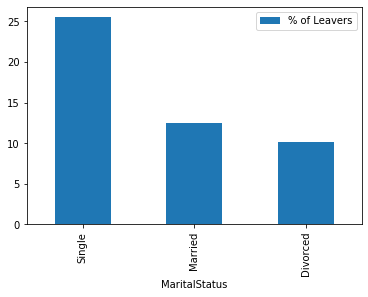

In [62]:
df_Jo = pd.DataFrame(columns=["MaritalStatus", "% of Leavers"])
i=0
for field in list(df["MaritalStatus"].unique()):
    ratio = df[(df['MaritalStatus']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['MaritalStatus']==field].shape[0]
    df_Jo.loc[i] = (field, round(ratio*100,2))
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_Jo.groupby(by="MaritalStatus").sum()
df_j=df_JR.sort_values(by="% of Leavers",ascending=False)
print (df_j.head())
ax = df_j.plot.bar(rot=90)

In [63]:
#looking at target variable'Attrition'
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64


 insights::
1.There are 237 employees left and 1233 employees stayed in our data.
2.The average Jobsatisfaction level of employees who stayed with the company is higher than that of the employees who left.
3.The average salary of employees who left the company is less than that of the employees who stayed.
4.The employees who had less to commute  are less likely to leave than that of the employee who had long commute.
5.The employees who worked on average 11 years were less likely to leave the company. 
6.single ,Male & Sales Representative were most likely to leave the company than their counterparts.

In [9]:
#creating new data frame from personal & non personal factors
df_psn=df[personal]

df_np=df[non_personal]
df_np.head()


,MonthlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,PerformanceRating,MonthlyRate,NumCompaniesWorked,DistanceFromHome,TotalWorkingYears,JobLevel,YearsInCurrentRole,Attrition
0,19479,4,5993,11,1,6,3,19479,8,1,8,2,4,Yes
1,24907,2,5130,23,3,10,4,24907,1,8,10,2,7,No
2,2396,3,2090,15,3,0,3,2396,6,2,7,1,0,Yes
3,23159,3,2909,11,3,8,3,23159,1,3,8,1,7,No
4,16632,2,3468,12,3,2,3,16632,9,2,6,1,2,No


In [10]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

#creating new dataframe for nonpersonal features and encoding 'Attrition'
df_num=df_np.copy()


df_num['Attrition']= label_encoder.fit_transform(df_num['Attrition']) 
df_num.head()



,MonthlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,PerformanceRating,MonthlyRate,NumCompaniesWorked,DistanceFromHome,TotalWorkingYears,JobLevel,YearsInCurrentRole,Attrition
0,19479,4,5993,11,1,6,3,19479,8,1,8,2,4,1
1,24907,2,5130,23,3,10,4,24907,1,8,10,2,7,0
2,2396,3,2090,15,3,0,3,2396,6,2,7,1,0,1
3,23159,3,2909,11,3,8,3,23159,1,3,8,1,7,0
4,16632,2,3468,12,3,2,3,16632,9,2,6,1,2,0


In [11]:
df_hot=df_psn.copy()


In [12]:
df_hot['Gender']= label_encoder.fit_transform(df_hot['Gender']) 


df_hot['Attrition']= label_encoder.fit_transform(df_hot['Attrition']) 


df_hot.head()

,Age,Education,Gender,MaritalStatus,RelationshipSatisfaction,JobRole,Attrition
0,41,2,0,Single,1,Sales Executive,1
1,49,1,1,Married,4,Research Scientist,0
2,37,2,1,Single,2,Laboratory Technician,1
3,33,4,0,Married,3,Research Scientist,0
4,27,1,1,Married,4,Laboratory Technician,0


In [13]:
# Get one hot encoding of columns 'MaritalStatus' &'JobRole'
mar_hot = pd.get_dummies(df_hot['MaritalStatus'])
# Drop column B as it is now encoded
df_test = df_hot.drop('MaritalStatus',axis = 1)
# Join the encoded df
df_test = df_test.join(mar_hot)

#getting one hot encoding for 'JobRole'col.
jr_hot = pd.get_dummies(df_test['JobRole'])
df_test1 = df_test.drop('JobRole',axis = 1)
df_test1=df_test1.join(jr_hot)
df_test1.head()
cols = list(df_test1.columns)
a, b = cols.index('Sales Representative'), cols.index('Attrition')
cols[b], cols[a] = cols[a], cols[b]
df_test1 = df_test1[cols]
df_test1.head()

,Age,Education,Gender,RelationshipSatisfaction,Sales Representative,Divorced,Married,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Attrition
0,41,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
1,49,1,1,4,0,0,1,0,0,0,0,0,0,0,1,0,0
2,37,2,1,2,0,0,0,1,0,0,1,0,0,0,0,0,1
3,33,4,0,3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,27,1,1,4,0,0,1,0,0,0,1,0,0,0,0,0,0


Now,Let's take a look at our Target variable:Attrition

In [14]:
df['Attrition'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [ ]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

In [16]:
#plotting heat maps for personal/non-personal factors
df_trans = df_num.copy()

df_trans1=df_test1.copy()

df_trans = df_trans.loc[:,~df_trans.columns.duplicated()]


In [17]:
#joining two dataframes into one

df_tr = pd.concat([df_trans1, df_trans],axis=1)



df_tr = df_tr.loc[:,~df_tr.columns.duplicated()]
cols = list(df_tr.columns)
a, b = cols.index('YearsInCurrentRole'), cols.index('Attrition')
cols[b], cols[a] = cols[a], cols[b]
df_tr = df_tr[cols]
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1470 non-null   int64
 1   Education                  1470 non-null   int64
 2   Gender                     1470 non-null   int64
 3   RelationshipSatisfaction   1470 non-null   int64
 4   Sales Representative       1470 non-null   uint8
 5   Divorced                   1470 non-null   uint8
 6   Married                    1470 non-null   uint8
 7   Single                     1470 non-null   uint8
 8   Healthcare Representative  1470 non-null   uint8
 9   Human Resources            1470 non-null   uint8
 10  Laboratory Technician      1470 non-null   uint8
 11  Manager                    1470 non-null   uint8
 12  Manufacturing Director     1470 non-null   uint8
 13  Research Director          1470 non-null   uint8
 14  Research Scientist      

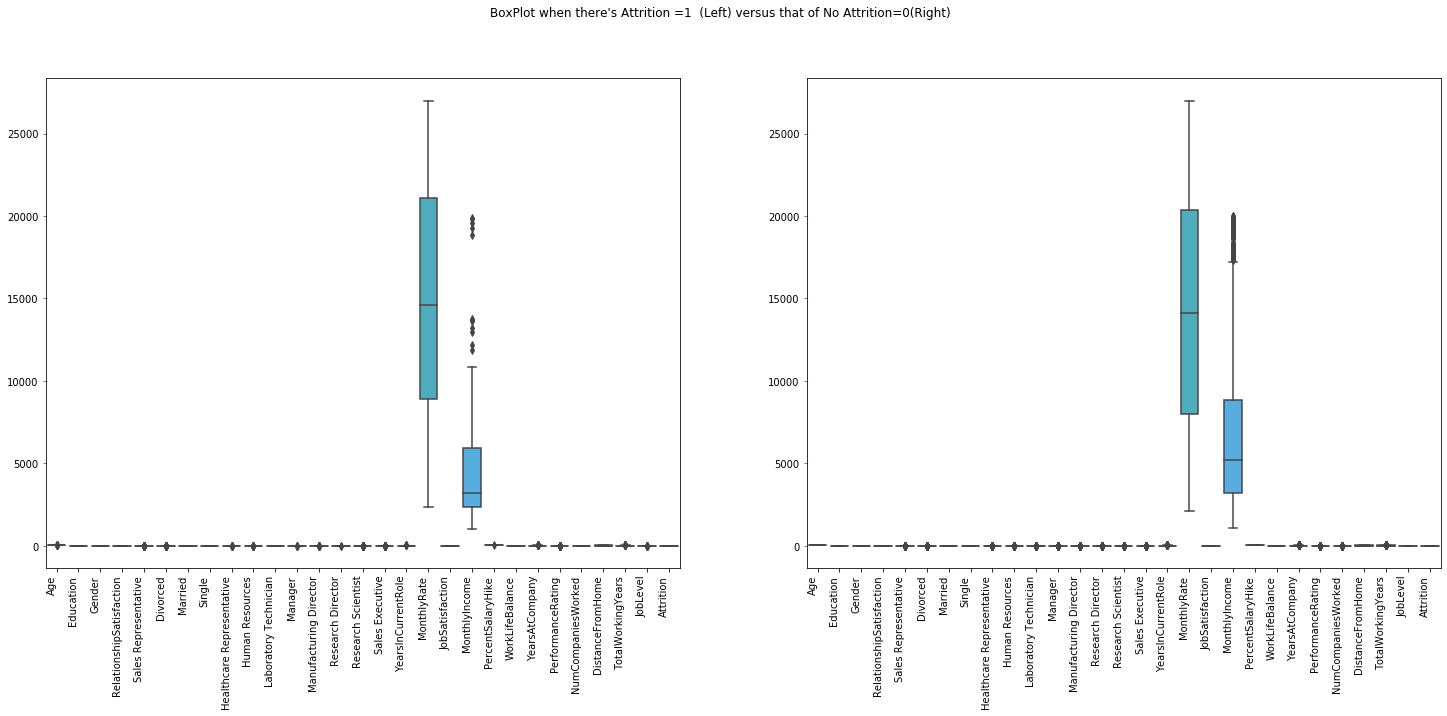

In [19]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = (25,15)
fig.suptitle("BoxPlot when there's Attrition =1  (Left) versus that of No Attrition=0(Right)")
df_tr1=df_tr[df_tr['Attrition']==1]
sns.boxplot(data=df_tr1,ax=ax[0])
color = 'tab:red'
ax[0].tick_params(axis='y', color=color)
#for pump failure=1
df_tr2=df_tr[df_tr['Attrition']==0]
sns.boxplot(data=df_tr2,ax=ax[1]);
color = 'tab:red'
ax[1].tick_params(axis='y', color=color)
fig.autofmt_xdate(rotation=90)









                  

As we can see,that only Monthly Income shows significant variance at two attrition states,all other variables seem to have no significant varaince.

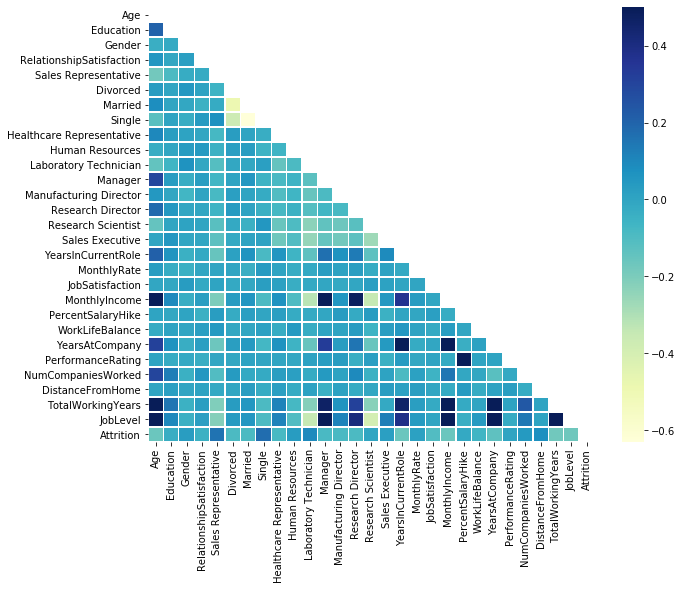

In [20]:
# plotting heat maps for non personal factors
corr = df_tr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            
            linewidths=.2, cmap="YlGnBu");

Most Positive Correlations: 
 Single                   0.175419
Sales Representative     0.157234
Laboratory Technician    0.098290
DistanceFromHome         0.077924
NumCompaniesWorked       0.043494
Name: Attrition, dtype: float64

Most Negative Correlations: 
 Age                  -0.159205
MonthlyIncome        -0.159840
YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
Name: Attrition, dtype: float64


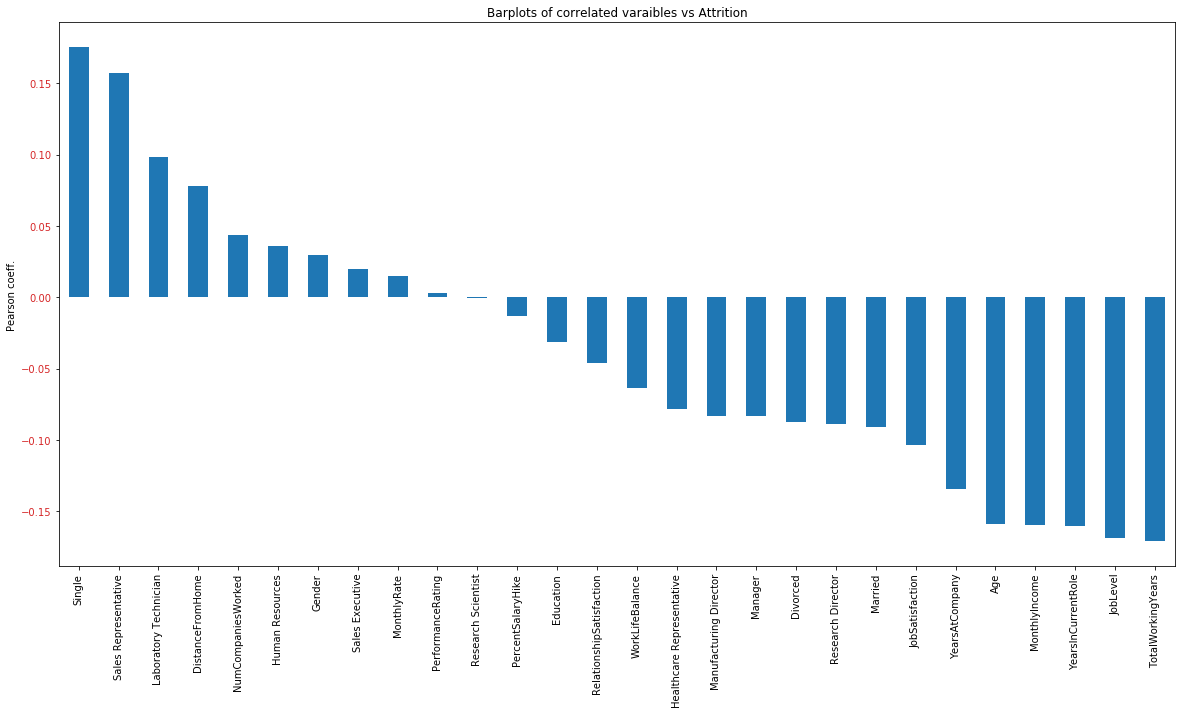

In [75]:
correlations = df_tr.corr()['Attrition'].sort_values(ascending=False)
correlations  = correlations.drop(['Attrition']);
plt.rcParams['figure.figsize'] = (20,10)

ax = correlations.plot.bar(y='Attrition',rot=0)


color = 'tab:red'
ax.tick_params(axis='y', labelcolor=color)
    
plt.ylabel('Pearson coeff.')
plt.title('Barplots of correlated varaibles vs Attrition');
plt.xticks(rotation=90);

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

As we can see that ,selecting only few columns didnot show significant correlation strength  with our Target variable ,we'll proceed further employing all numerical and categorical columns.

In [21]:
#lets unite the dataframe both numerical and categorical columns into one data frame



obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()
obj_df.columns.values

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

le_count = 0
for col in obj_df.columns[1:]:
    if obj_df[col].dtype == 'object':
        if len(list(obj_df[col].unique())) <= 2:
            le.fit(obj_df[col])
            obj_df[col] = le.transform(obj_df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))


3 columns were label encoded.


In [23]:
obj_df.columns.values

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

In [24]:
obj = pd.get_dummies(obj_df, drop_first=True)
obj.columns.values


array(['Gender', 'Over18', 'OverTime', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single'], dtype=object)

In [25]:
num_df = data.select_dtypes(include=['int64']).copy()



In [26]:
df_join=pd.concat([obj,num_df],axis=1)

df_join.columns.values


array(['Gender', 'Over18', 'OverTime', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSa

In [27]:
#df_join.drop(['EmployeeCount', 'EmployeeNumber',
          #  'StandardHours'], axis=1, inplace=True)


df_join.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis=1, inplace=True)

In [28]:
#swapping columns
cols = list(df_join.columns)
a, b = cols.index('YearsWithCurrManager'), cols.index('Attrition_Yes')
cols[b], cols[a] = cols[a], cols[b]
df_join = df_join[cols]
df_join.columns.values

array(['Gender', 'OverTime', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'Tota

Most Positive Correlations: 
 OverTime                            0.246
MaritalStatus_Single                0.175
JobRole_Sales Representative        0.157
BusinessTravel_Travel_Frequently    0.115
Name: Attrition_Yes, dtype: float64

Most Negative Correlations: 
 MonthlyIncome        -0.160
YearsInCurrentRole   -0.161
JobLevel             -0.169
TotalWorkingYears    -0.171
Name: Attrition_Yes, dtype: float64


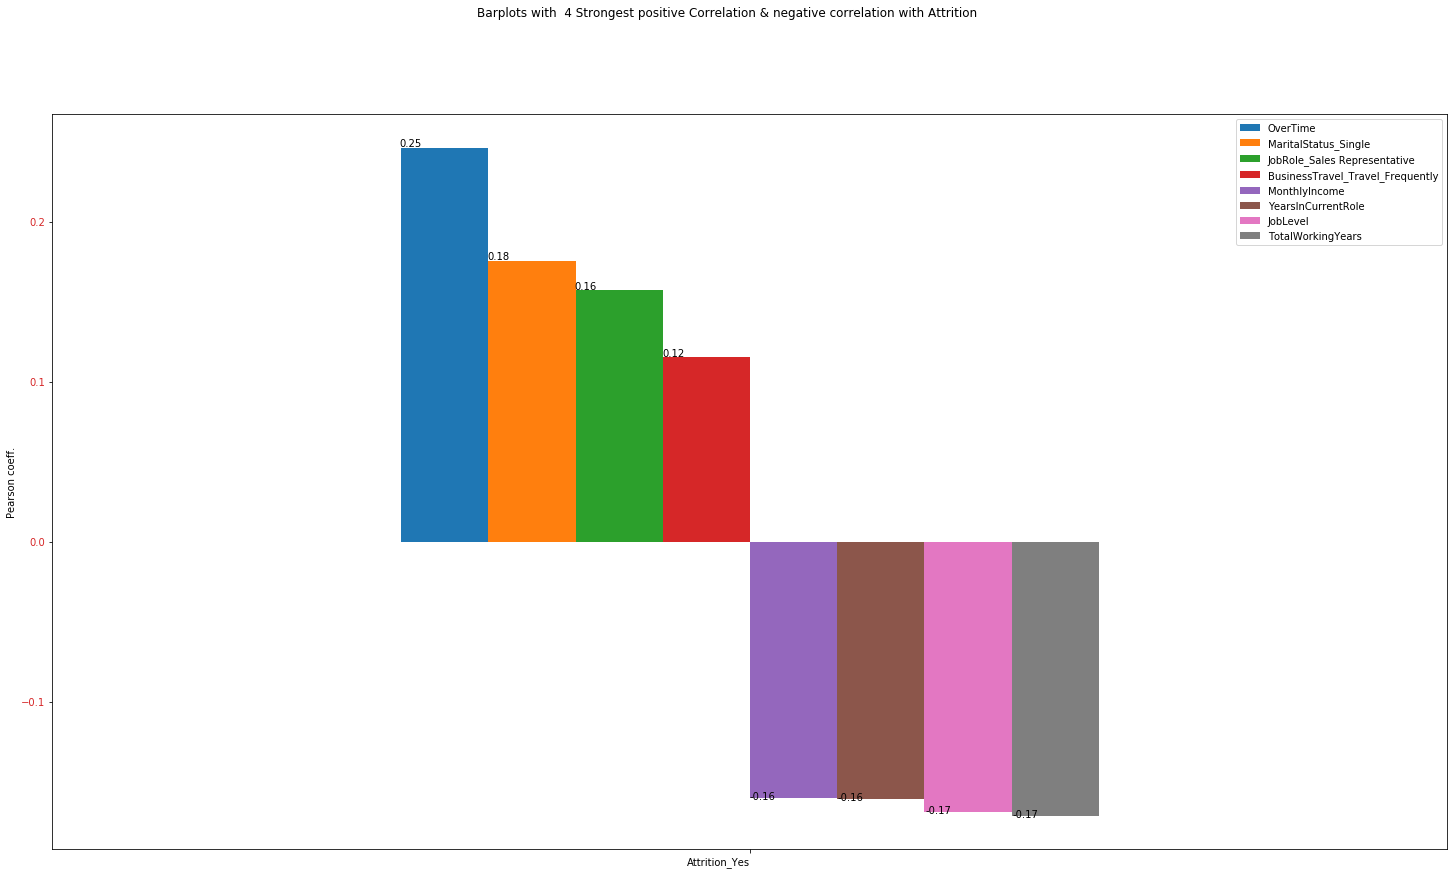

In [29]:
#let's see correlations 
fig, ax = plt.subplots(1, 1)  
plt.rcParams['figure.figsize'] = (15,10)

fig.suptitle("Barplots with  4 Strongest positive Correlation & negative correlation with Attrition")
pos_correlations = df_join.corr()['Attrition_Yes'].sort_values(ascending=False).head(5)
pos_correlations  = pos_correlations.drop(['Attrition_Yes']);

neg_correlations = df_join.corr()['Attrition_Yes'].sort_values(ascending=False).tail(4)


#neg_correlations.plot.bar(y='Attrition_Yes',rot=0,ax=ax2)
df_series = pd.concat([pos_correlations,neg_correlations], axis=0)

color = 'tab:red'
ax.tick_params(axis='y', labelcolor=color)
    
plt.ylabel('Pearson coeff.')
#df_series['positive'] = data['values'] > 0

#plt.xticks(rotation=90);
fig.autofmt_xdate(rotation=90)

print('Most Positive Correlations: \n',round(pos_correlations .head(6),3))
print('\nMost Negative Correlations: \n', round(neg_correlations.tail(5),3))
df_series.head()
np.argpartition(df_series, -8)[-8:]
type(df_series)
df_sr = pd.DataFrame([df_series])

df_sr.columns.values
df_sr.plot.bar(rot=0,ax=ax)

df_sr.head(10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

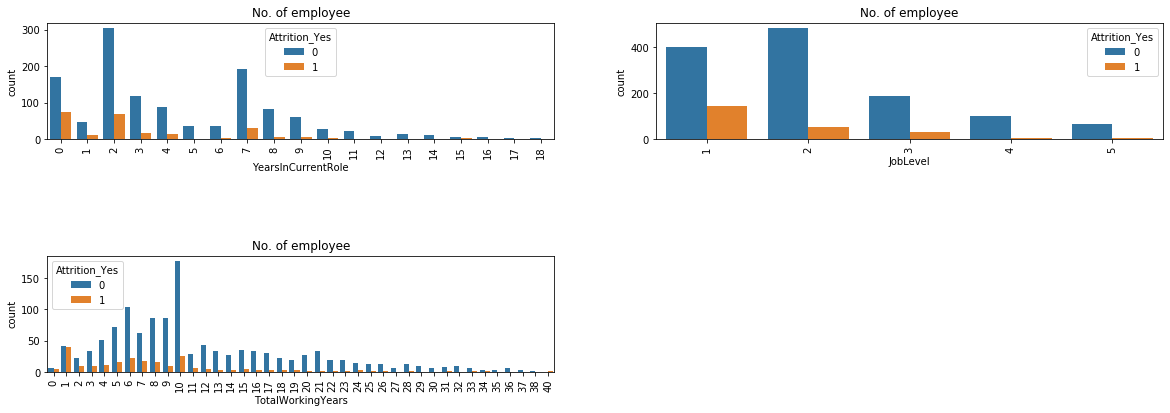

In [142]:
#lets look at the count plots  of rank attributes we've selected 
fig=plt.subplots(figsize=(20,15))
rank=['YearsInCurrentRole','JobLevel' ,'TotalWorkingYears']


for i, j in enumerate(rank):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_join, hue='Attrition_Yes')
    plt.xticks(rotation=90)
    
    
    plt.title("No. of employee")

In [41]:
hr_vars=df_join.columns.values.tolist()
y=['Attrition_Yes']
X=[i for i in hr_vars if i not in y]
df_join.columns.values

array(['Gender', 'OverTime', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'Tota

In [30]:

#Selecting all features excluding Attrition
cols=['Gender', 'OverTime',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
        'JobRole_Manager','JobRole_Laboratory Technician',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
y=df_join['Attrition_Yes']
X=df_join[cols]
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             1470 non-null   int64
 1   OverTime                           1470 non-null   int64
 2   YearsWithCurrManager               1470 non-null   int64
 3   BusinessTravel_Travel_Frequently   1470 non-null   uint8
 4   BusinessTravel_Travel_Rarely       1470 non-null   uint8
 5   Department_Research & Development  1470 non-null   uint8
 6   Department_Sales                   1470 non-null   uint8
 7   EducationField_Life Sciences       1470 non-null   uint8
 8   EducationField_Marketing           1470 non-null   uint8
 9   EducationField_Medical             1470 non-null   uint8
 10  EducationField_Other               1470 non-null   uint8
 11  EducationField_Technical Degree    1470 non-null   uint8
 12  JobRole_Human Resour

In [31]:
#Running Logistic Regression Model
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))
print(classification_report(y_test, logreg.predict(X_test)))
logreg.coef_

Logistic regression accuracy: 0.841
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       370
           1       0.55      0.08      0.15        71

    accuracy                           0.84       441
   macro avg       0.70      0.54      0.53       441
weighted avg       0.80      0.84      0.79       441



/Users/prahlad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 1.30527415e-03,  9.38519334e-02,  2.94794835e-02,
        -1.06751411e-02, -3.26497013e-02,  3.33950016e-02,
        -5.77308714e-03,  2.00823447e-02, -2.41942419e-02,
        -1.15724909e-03,  9.40543586e-03,  6.15253664e-04,
        -1.24071878e-03,  1.36770078e-02, -6.37620805e-03,
        -4.21372065e-03, -2.07438095e-02,  1.42372855e-02,
         1.91479274e-02, -3.17146811e-02,  5.56582087e-02,
        -2.82569433e-02, -5.12393527e-04,  4.25754557e-02,
         1.45749978e-02, -7.14275654e-02,  5.96574459e-03,
        -6.16113425e-02, -4.12084603e-03, -6.49701178e-02,
        -1.13270988e-04,  1.33537187e-05,  1.34020511e-01,
         1.63932387e-02,  1.15240259e-02, -4.13740397e-02,
        -7.72513671e-02,  2.92487321e-02, -5.35280361e-02,
        -3.11588308e-02,  8.29911854e-03, -1.61598004e-01,
         9.31694459e-02, -1.16753621e-01]])

In [ ]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

In [146]:
#Fine-tuning

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.9909999999999999, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.9909999999999999}
best score: 0.8150604162312575


In [48]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))


              precision    recall  f1-score   support

           0       0.94      0.75      0.83       370
           1       0.36      0.73      0.48        71

    accuracy                           0.75       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.84      0.75      0.78       441



In [49]:

print(logreg.coef_)
print(cols)

[[ 1.64476004e-01  1.24588313e+00  3.87628236e-01  3.35771685e-02
  -2.01474783e-01  3.06032956e-01 -1.74100060e-02  2.06880972e-01
  -2.47608492e-01 -2.34438340e-02  1.55776947e-01  2.74552536e-02
  -3.38689965e-02  2.80984305e-01  6.10622323e-03 -5.82705178e-02
  -2.03356720e-01  6.00656030e-02  2.50602846e-01 -1.44615054e-01
   4.60399366e-01 -1.20767643e-02 -2.22037178e-04  3.21955587e-02
   5.88400582e-02 -2.50374128e-01 -5.56119204e-04 -2.60134859e-01
  -9.70509658e-04 -2.16986518e-01 -1.46747357e-04  1.50795383e-05
   1.20409311e-01  1.92630799e-02  3.30585163e-01 -1.50328866e-01
  -2.36602666e-01 -3.61793952e-02 -8.82920925e-02 -1.23806510e-01
   8.50392493e-02 -9.99207177e-02  1.03249545e-01 -9.60641344e-02]]
['Gender', 'OverTime', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationFiel

,feature,importance
1,OverTime,1.876621
2,BusinessTravel_Travel_Frequently,1.365081
13,JobRole_Laboratory Technician,1.279337
20,MaritalStatus_Single,1.212511
18,JobRole_Sales Representative,0.954575
14,JobRole_Manufacturing Director,0.872419
5,Department_Sales,0.864025
3,BusinessTravel_Travel_Rarely,0.784381
11,JobRole_Human Resources,0.727171
10,EducationField_Technical Degree,0.538031


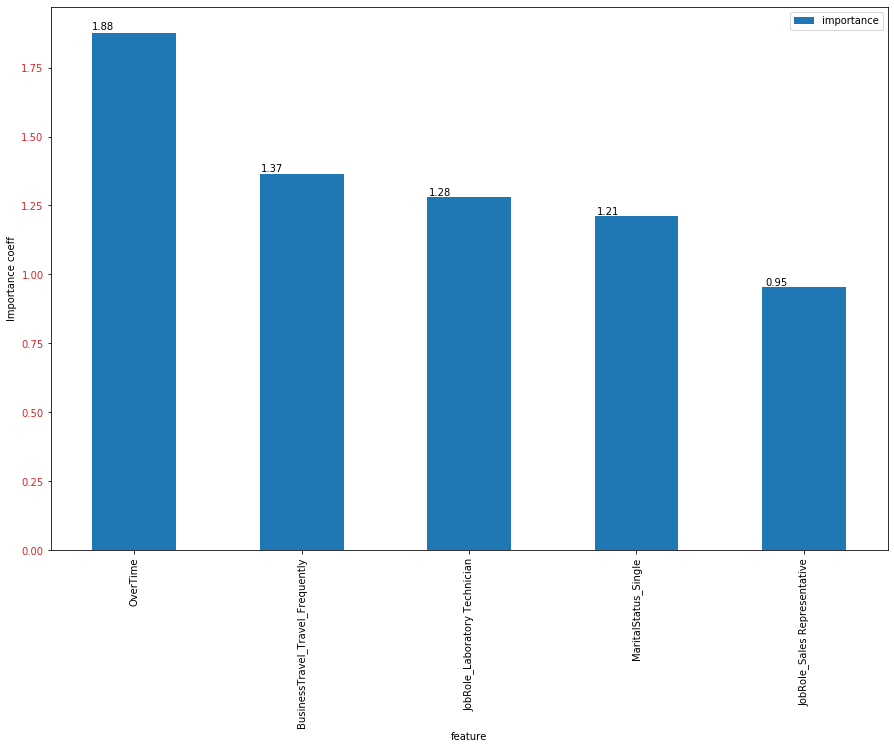

In [147]:
#finding feature importance of Logistic Regression model

feature_importance=pd.DataFrame(np.hstack((np.array([cols[0:]]).T, log_opt.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
fig, ax = plt.subplots(1, 1)  
plt.rcParams['figure.figsize'] = (15,5)
color = 'tab:red'
ax.tick_params(axis='y', labelcolor=color)
    
plt.ylabel('Importance coeff')
feature_importance.sort_values(by='importance', ascending=False).head(5).plot.bar(x='feature',ax=ax,rot=90)

feature_importance.sort_values(by='importance', ascending=False).head(5)
#fig.autofmt_xdate(rotation=90)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    
f_i=feature_importance.sort_values(by='importance', ascending=False)
f_i.head(10)


In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.80      0.17      0.28        71

    accuracy                           0.86       441
   macro avg       0.83      0.58      0.60       441
weighted avg       0.85      0.86      0.82       441



JobRole_Manager-0.14%
JobRole_Research Director-0.15%
JobRole_Human Resources-0.15%
JobRole_Research Scientist-0.54%
JobRole_Manufacturing Director-0.55%
EducationField_Marketing-0.56%
EducationField_Other-0.56%
Gender-0.58%
PerformanceRating-0.61%
JobRole_Sales Executive-0.67%
BusinessTravel_Travel_Frequently-0.76%
EducationField_Life Sciences-0.84%
BusinessTravel_Travel_Rarely-0.89%
Department_Research & Development-0.92%
EducationField_Medical-0.94%
Department_Sales-0.94%
JobRole_Sales Representative-0.95%
EducationField_Technical Degree-0.96%
JobRole_Laboratory Technician-1.13%
MaritalStatus_Married-1.32%
MaritalStatus_Single-1.62%
RelationshipSatisfaction-1.68%
EnvironmentSatisfaction-1.95%
JobSatisfaction-2.01%
JobInvolvement-2.06%
JobLevel-2.11%
WorkLifeBalance-2.13%
Education-2.19%
YearsSinceLastPromotion-2.52%
StockOptionLevel-2.76%
NumCompaniesWorked-2.92%
YearsWithCurrManager-3.39%
TrainingTimesLastYear-3.55%
HourlyRate-3.56%
YearsInCurrentRole-3.76%
DistanceFromHome-3.88%
P

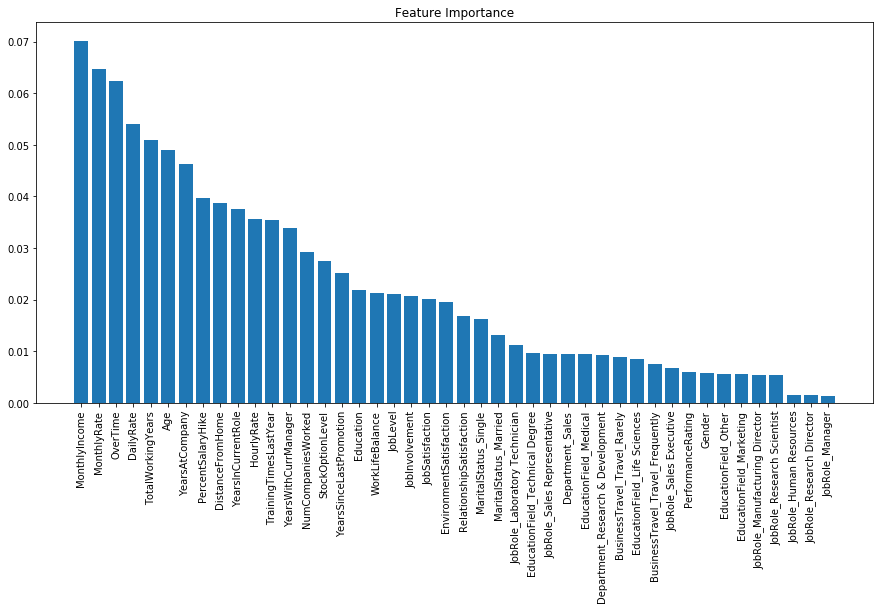

In [100]:
feature_labels = np.array(['Gender', 'OverTime',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
        'JobRole_Manager','JobRole_Laboratory Technician',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    
    
   
indices = np.argsort(importance)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importance[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    

In [36]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  df_join[['TotalWorkingYears', 'MonthlyIncome']][df_join.Attrition_Yes == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

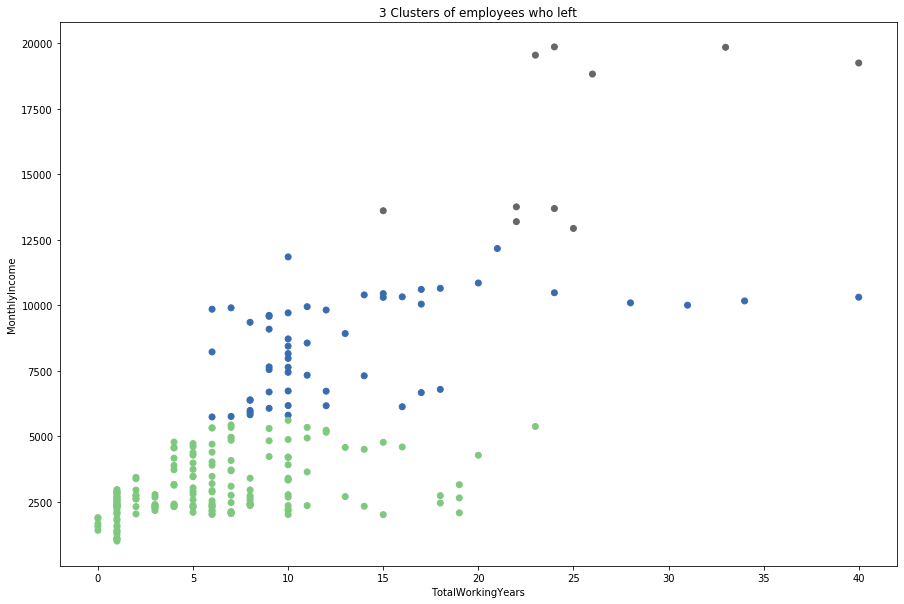

In [38]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['TotalWorkingYears'], left_emp['MonthlyIncome'], c=left_emp['label'],cmap='Accent')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.title('3 Clusters of employees who left')
plt.show()

**Here, Employee who left the company can be grouped into 3 type of employees:

High Monthly Income and High Total working years(Shaded by gray color in the graph), you can also call them low risk Churn category.
Low Monthly Income and Low Total working years(Shaded by green color in the graph), you can also call them High Risk Churn category.
Moderate Monthly Income and moderate Total working years (Shaded by blue color in the graph), you can also call them Medium Risk churn category.

##A better Precision(0.80)shows that our model can better predict true positivei.e employees that left and labeled as churn from  the false Positives i.e employees who were actually active but were labeled as left so that we have a realistic look at the current churn numbers  at hand and propose goal of reducing that rate of Churn.Thus,propelling the purpose of our Problem Statement,which is to reduce Churn by @ least 10%.

The stronger indicators of people leaving include:

1.Over Time: people who work overtime are more likelty to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.


2.Total working years:The more experienced employees are less likely to leave. Employees who have between 5-10 years of experience should be identified as potentially having a higher-risk of leaving.


3..Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.

4.YearsInCurrentRole:employees who are in current role less than 3 years are more likely to leave.

5.JobRole_Sales Representative:Sales Representative are highly likely to leave more than anyother roles.Management should incentivize Sales Rep and probably need to revisit the whole Sales Rep training system.

